# Initial EDA Data Jobs

In [476]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


In [477]:
df = pd.read_csv('alldata.csv')

## Exploring The Data

In [478]:
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


## Dropping rows with all null values

In [479]:
df.isna().all(axis=1).value_counts()

False    6953
True       11
dtype: int64

In [480]:
# how many null values in reviews

df['reviews'].isnull().value_counts()

False    5326
True     1638
Name: reviews, dtype: int64

## Cleaning Location Column

In [481]:
import re

In [482]:
# making sure all values are strings

df['location'] = [str(item) for item in df['location']]

In [483]:
# remove whitespace from rightside of the string
location_strip = [place.rstrip() for place in df['location']]

# removing postal code
location_sub = [re.sub(r'[0-9]', '', place) for place in location_strip]

# remove whitespace from rightside of the string
location_new = [place.rstrip() for place in location_sub]

In [484]:
df['location'] = location_new

In [485]:
df['location'].unique()

array(['Atlanta, GA', 'Austin, TX', 'Round Rock, TX', 'Cedar Park, TX',
       'nan', 'Boulder, CO', 'Boston, MA', 'Chicago, IL',
       'Washington, DC', 'Los Angeles, CA', 'Cambridge, MA',
       'Mountain View, CA', 'Manhattan, NY', 'New York, NY',
       'Jersey City, NJ', 'Newark, NJ', 'Oakland, NJ', 'Bronx, NY',
       'Hoboken, NJ', 'Brooklyn, NY', 'Rutherford, NJ', 'Union, NJ',
       'Rahway, NJ', 'Murray Hill, NJ', 'South Plainfield, NJ',
       'Queens, NY', 'Little Falls, NJ', 'Florham Park, NJ',
       'Troy Hills, NJ', 'Bloomfield, NJ', 'Lynbrook, NY',
       'Allendale, NJ', 'Parsippany, NJ', 'West Orange, NJ',
       'Kenilworth, NJ', 'Ridgefield, NJ', 'Harrison, NY',
       'Montclair, NJ', 'Fort Lee, NJ', 'Carlstadt, NJ', 'Orangeburg, NY',
       'Fairfield, NJ', 'Palisades, NY', 'Hackensack, NJ', 'Roseland, NJ',
       'East Hanover, NJ', 'Long Beach, NY', 'Whippany, NJ',
       'Manhasset, NY', 'Yonkers, NY', 'New Hyde Park, NY',
       'Secaucus, NJ', 'Port Washing

## Creating state and city columns

In [486]:
df['city'] = [place.split(',')[0] for place in df['location']]

In [487]:
# gives me index is out of range error, not sure why

#df['state'] = [place.split(',')[1] for place in df['location'].dropna()]

In [488]:
df['state'] = df['location'].str[-2:]

In [489]:
df['city'].value_counts()

New York          848
Seattle           777
Cambridge         694
Boston            629
San Francisco     564
                 ... 
Short Hills         1
Manhattanville      1
Woodcliff Lake      1
Bedminster          1
Long Beach          1
Name: city, Length: 92, dtype: int64

### consider dealing with null values which are producing a state called 'an'

In [490]:
df['state'].value_counts()

CA    2152
MA    1323
WA     935
NY     926
IL     471
DC     340
GA     269
CO     251
TX     218
NJ      68
an      11
Name: state, dtype: int64

In [491]:
df.head()

,position,company,description,reviews,location,city,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA",Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA",Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA",Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",Atlanta,GA


## Cleaning Description Column

In [492]:
df['description'] = [str(item) for item in df['description']]

In [493]:
df['description'] = [re.sub(r'\n+', ' ', string) for string in df['description']]
#df['description'] = [re.sub(r'\\', '', string) for string in df['description']]

In [494]:
# getting rid of . and ,

df['description'] = df['description'].apply(lambda x:x.replace('.', ' ').replace(',', ' ').replace('/', ' '))

## Creating category Column

In [495]:
df['position'] = [str(item) for item in df['description']]

In [496]:
category = []

for position in df['position']:
    if 'data science' in position.lower() or 'machine learning' in position.lower() or 'data scientist' in position.lower():
        category.append('Data Scientist')
    
    elif 'analyst' in position.lower() or 'analytics' in position.lower():
        category.append('Data Analyst')

    elif 'artificial intelligence' in position.lower() or 'engineer' in position.lower() or 'ai' in position.lower():
        category.append('Data Engineer')
    
    else:
        category.append('Other')

In [497]:
df['category'] = category

In [498]:
df.head()

,position,company,description,reviews,location,city,state,category
0,Development Director ALS Therapy Development I...,ALS TDI,Development Director ALS Therapy Development I...,NaN,"Atlanta, GA",Atlanta,GA,Data Engineer
1,"Job Description ""The road that leads to accomp...",The Hexagon Lavish,"Job Description ""The road that leads to accomp...",NaN,"Atlanta, GA",Atlanta,GA,Data Engineer
2,Growing company located in the Atlanta GA are...,Xpert Staffing,Growing company located in the Atlanta GA are...,NaN,"Atlanta, GA",Atlanta,GA,Data Scientist
3,DEPARTMENT: Program OperationsPOSITION LOCATIO...,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",Atlanta,GA,Data Scientist
4,DESCRIPTION The Emory University Department of...,Emory University,DESCRIPTION The Emory University Department of...,550.0,"Atlanta, GA",Atlanta,GA,Data Scientist


## MORE EDA

In [499]:
df.head()

,position,company,description,reviews,location,city,state,category
0,Development Director ALS Therapy Development I...,ALS TDI,Development Director ALS Therapy Development I...,NaN,"Atlanta, GA",Atlanta,GA,Data Engineer
1,"Job Description ""The road that leads to accomp...",The Hexagon Lavish,"Job Description ""The road that leads to accomp...",NaN,"Atlanta, GA",Atlanta,GA,Data Engineer
2,Growing company located in the Atlanta GA are...,Xpert Staffing,Growing company located in the Atlanta GA are...,NaN,"Atlanta, GA",Atlanta,GA,Data Scientist
3,DEPARTMENT: Program OperationsPOSITION LOCATIO...,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",Atlanta,GA,Data Scientist
4,DESCRIPTION The Emory University Department of...,Emory University,DESCRIPTION The Emory University Department of...,550.0,"Atlanta, GA",Atlanta,GA,Data Scientist


## skills to includes

In [500]:
# we will do r separately

skills_list = ['sql', 'tableau', 'oracle', 'qliksense',
 'python', 'hadoop', 'perl', 'java', 'c++', 'spark', 'kafka', 
 'azure', 'spss', 'sas', 'excel', 'aws', 'big data', 'power bi']

soft_skills = ['statistics', 'mathematics', 'probability', 'machine learning', 
'data analysis', 'data visualization', 'modeling', 'deep learning', 
'a b testing', 'web scraping', 'neural network', 'interpersonal skills', 
'communication skills', 'artificial intelligence']

# crm, salesforce, ux, cloud

## Columns for Skills

In [501]:
for skill in skills_list:

    i = []

    for description in df['description']:
        if skill in description.lower():
            i.append(1)
        else:
            i.append(0)

    df[skill] = i

In [502]:
df['python'].value_counts()

0    4112
1    2852
Name: python, dtype: int64

In [503]:
'''df['sql'] = (df['sql'] + df['mysql'])'''

"df['sql'] = (df['sql'] + df['mysql'])"

In [504]:
'''df['sql'] = df['sql'].apply(lambda x:x/2 if x == 2 else x)'''

"df['sql'] = df['sql'].apply(lambda x:x/2 if x == 2 else x)"

In [505]:
'''df['sql'].value_counts()'''

"df['sql'].value_counts()"

In [506]:
# getting R

r_list = []

for description in df['description']:
    if 'R'  in description.split():
        r_list.append(1)
    else:
        r_list.append(0)

df['r'] = r_list

In [507]:
df['oracle'].value_counts()

0    6749
1     215
Name: oracle, dtype: int64

## Columns for soft_skills

In [508]:
for skill in soft_skills:

    i = []

    for description in df['description']:
        if skill in description.lower():
            i.append(1)
        else:
            i.append(0)

    df[skill] = i

## Columns for education

In [509]:
education_list = ['mba', 'm b a','phd', 'ph d','master', 'masters', 'm s','bachelor', 'bachelors', "bachelor's" ,'ba', 'bs', 'b s', 'bsc']

In [510]:
degree = pd.DataFrame()
for edu in education_list:

    i = []

    for description in df['description']:
        if edu in description.lower():
            i.append(1)
        else:
            i.append(0)

    degree[edu] = i
degree.head()

,mba,m b a,phd,ph d,master,masters,m s,bachelor,bachelors,bachelor's,ba,bs,b s,bsc
0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
1,0,0,0,1,1,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,1,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,1,0,1,1,0,1,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [511]:
df['phd'] = degree['phd'] | degree['ph d']

df['mba'] = degree['mba'] | degree['m b a']

df['master'] = degree['masters'] | degree['master'] | degree['m s']
df['bachelor'] = degree['bachelor'] | degree['bachelors'] | degree["bachelors"] | degree['ba'] | degree['b s'] | degree['bsc']

In [512]:
df.head()

,position,company,description,reviews,location,city,state,category,sql,tableau,oracle,qliksense,python,hadoop,perl,java,c++,spark,kafka,azure,spss,sas,excel,aws,big data,power bi,r,statistics,mathematics,probability,machine learning,data analysis,data visualization,modeling,deep learning,a b testing,web scraping,neural network,interpersonal skills,communication skills,artificial intelligence,phd,mba,master,bachelor
0,Development Director ALS Therapy Development I...,ALS TDI,Development Director ALS Therapy Development I...,NaN,"Atlanta, GA",Atlanta,GA,Data Engineer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"Job Description ""The road that leads to accomp...",The Hexagon Lavish,"Job Description ""The road that leads to accomp...",NaN,"Atlanta, GA",Atlanta,GA,Data Engineer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1
2,Growing company located in the Atlanta GA are...,Xpert Staffing,Growing company located in the Atlanta GA are...,NaN,"Atlanta, GA",Atlanta,GA,Data Scientist,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1
3,DEPARTMENT: Program OperationsPOSITION LOCATIO...,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",Atlanta,GA,Data Scientist,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1
4,DESCRIPTION The Emory University Department of...,Emory University,DESCRIPTION The Emory University Department of...,550.0,"Atlanta, GA",Atlanta,GA,Data Scientist,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


## Getting word Counts

In [513]:
from collections import Counter

In [514]:
description = ''

for thing in df['description']:
    description += thing

In [515]:
description = description.replace('.', ' ')

In [516]:
'''counter = Counter(description.split())
counter.most_common(500)'''

'counter = Counter(description.split())\ncounter.most_common(500)'

## EDA with columns

## Creating the melted df for Skills (not using)

In [517]:
df.head()

,position,company,description,reviews,location,city,state,category,sql,tableau,oracle,qliksense,python,hadoop,perl,java,c++,spark,kafka,azure,spss,sas,excel,aws,big data,power bi,r,statistics,mathematics,probability,machine learning,data analysis,data visualization,modeling,deep learning,a b testing,web scraping,neural network,interpersonal skills,communication skills,artificial intelligence,phd,mba,master,bachelor
0,Development Director ALS Therapy Development I...,ALS TDI,Development Director ALS Therapy Development I...,NaN,"Atlanta, GA",Atlanta,GA,Data Engineer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"Job Description ""The road that leads to accomp...",The Hexagon Lavish,"Job Description ""The road that leads to accomp...",NaN,"Atlanta, GA",Atlanta,GA,Data Engineer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1
2,Growing company located in the Atlanta GA are...,Xpert Staffing,Growing company located in the Atlanta GA are...,NaN,"Atlanta, GA",Atlanta,GA,Data Scientist,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1
3,DEPARTMENT: Program OperationsPOSITION LOCATIO...,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",Atlanta,GA,Data Scientist,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1
4,DESCRIPTION The Emory University Department of...,Emory University,DESCRIPTION The Emory University Department of...,550.0,"Atlanta, GA",Atlanta,GA,Data Scientist,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [518]:
df1 = df.iloc[:,8:28].melt()

Text(0.5, 1.0, 'Skills mentioned in Job Descriptions')

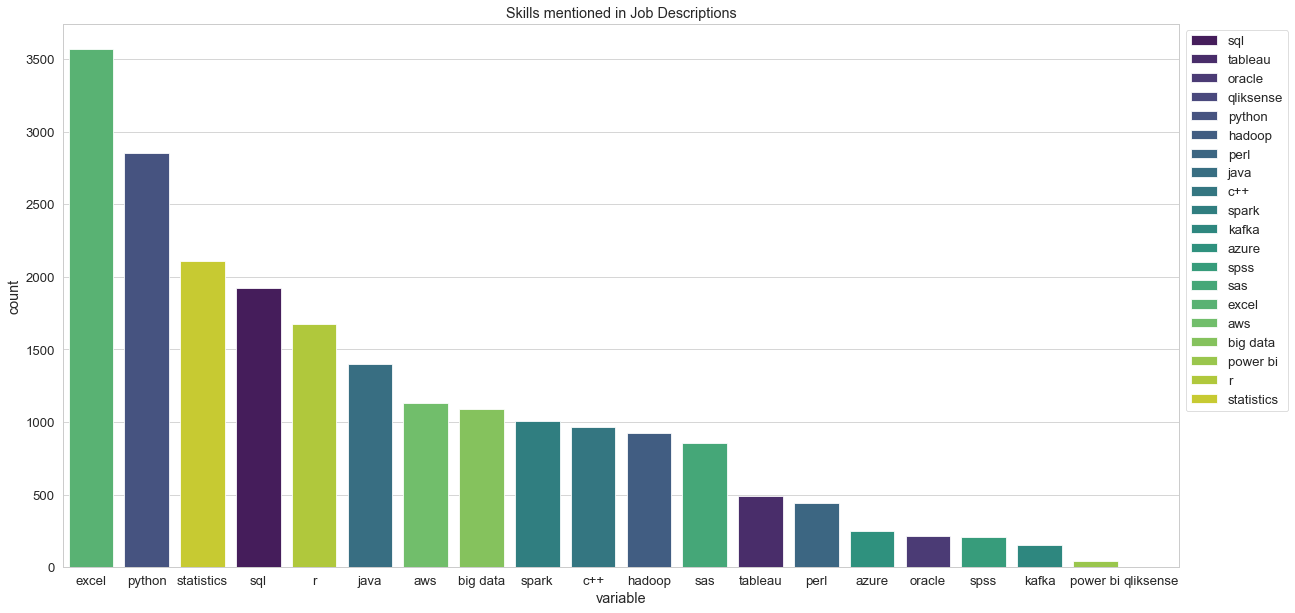

In [519]:
plt.figure(figsize=(20,10))
sns.countplot(data=df1.loc[df1['value']==1], x='variable', hue='variable', dodge=False, palette='viridis', order=df1['variable'][df1['value'] == 1].value_counts().index)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Skills mentioned in Job Descriptions')

## filtering for data science

In [520]:
df_ds_melt = df[df['category'] == 'Data Scientist'].iloc[:,8:30].melt()

Text(0.5, 1.0, 'Skills mentioned in Data Science Job Descriptions')

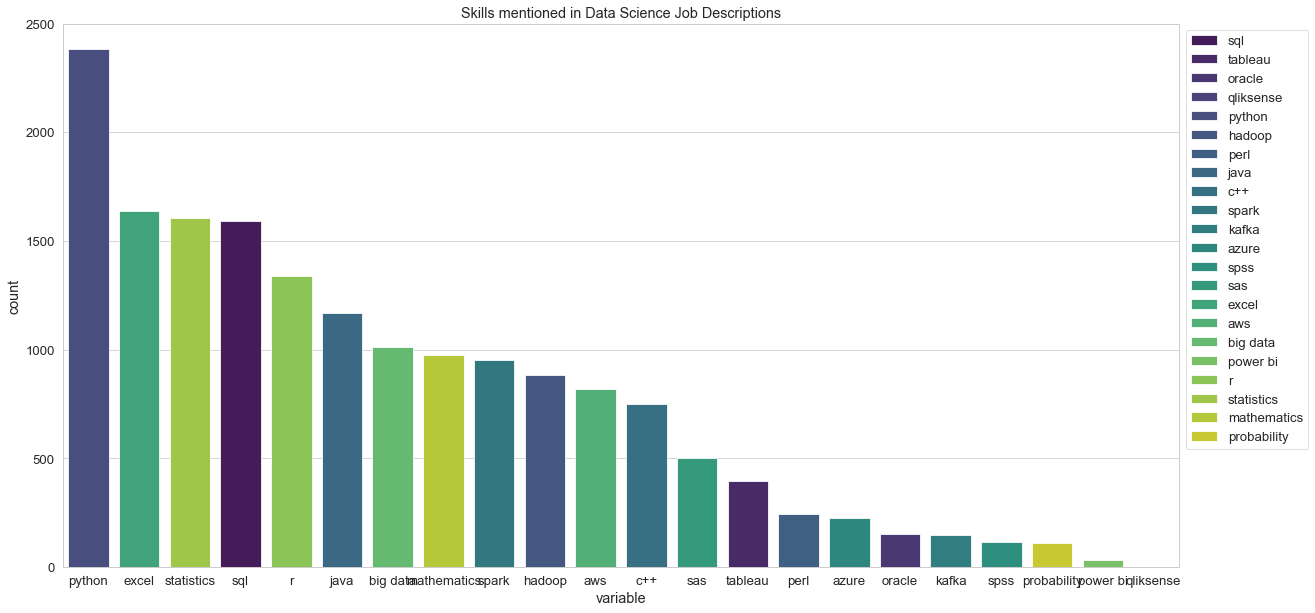

In [521]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(data=df_ds_melt.loc[df_ds_melt['value']==1], x='variable', hue='variable', dodge=False, palette='viridis', order=df_ds_melt['variable'][df_ds_melt['value'] == 1].value_counts().index)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Skills mentioned in Data Science Job Descriptions')

In [522]:
# getting order for data science

#order = titanic['class'].value_counts().index

#df_ds_melt['variable'][df_ds_melt['value'] == 0].value_counts()

In [523]:
df_ds_melt

,variable,value
0,sql,1
1,sql,1
2,sql,0
3,sql,1
4,sql,0
...,...,...
81109,probability,0
81110,probability,0
81111,probability,0
81112,probability,0


## Data analytics Graph

In [524]:
df_da_melt = df[df['category'] == 'Data Analyst'].iloc[:,8:27].melt()

Text(0.5, 1.0, 'Tools mentioned in Data Analyst Job Descriptions')

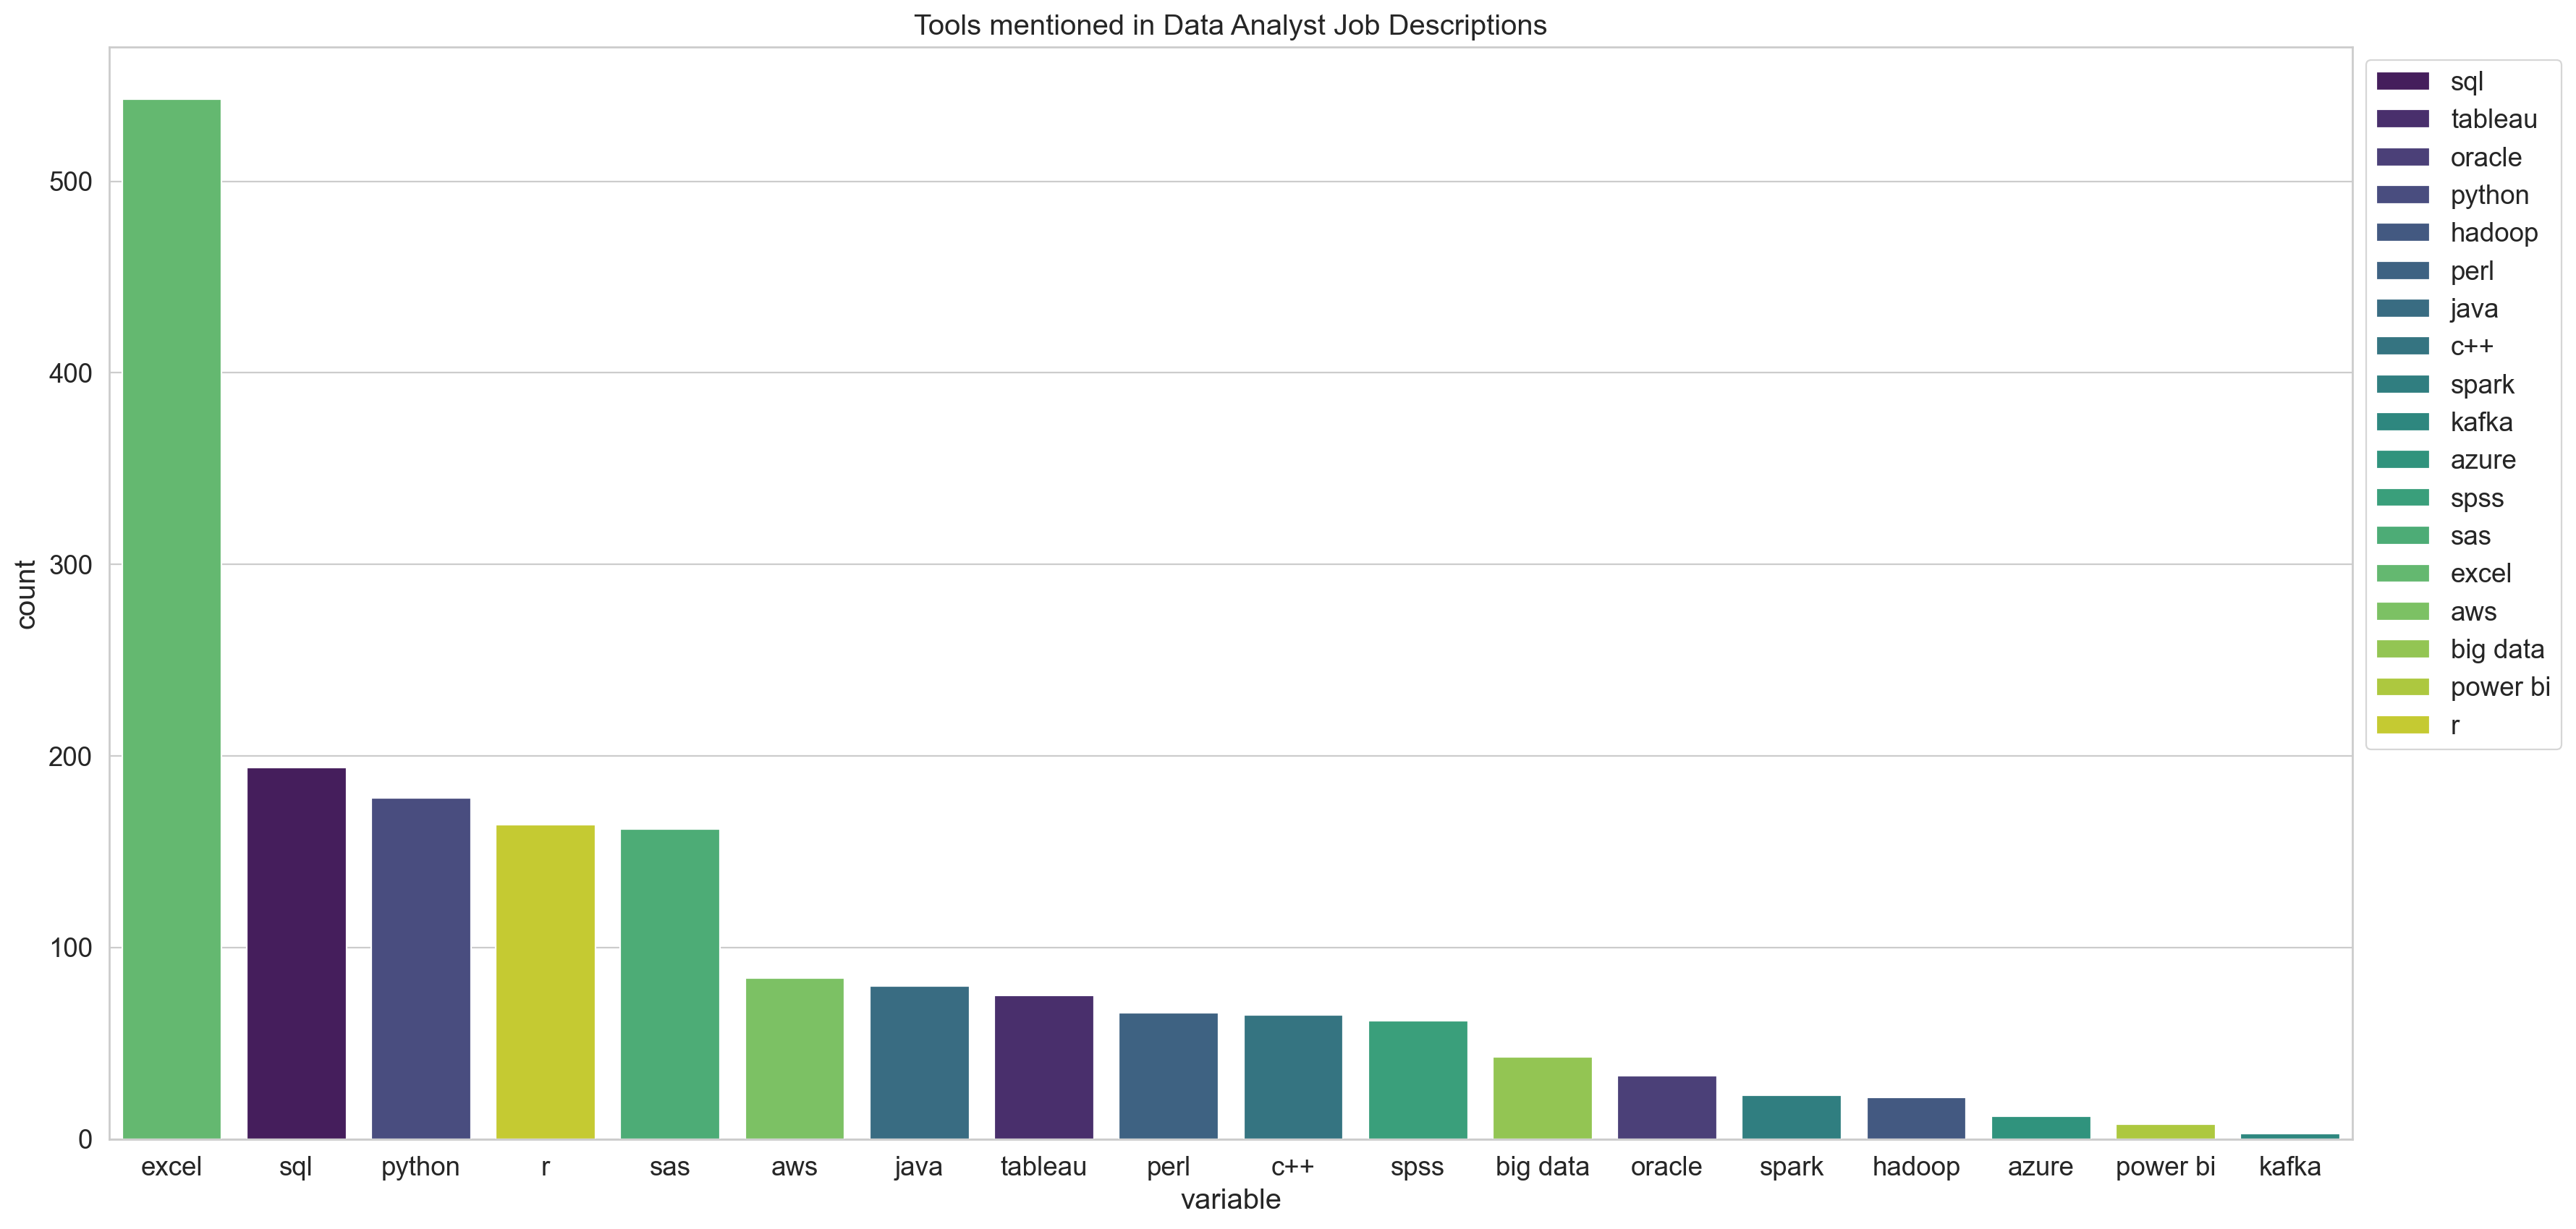

In [525]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10), dpi=200)
sns.countplot(data=df_da_melt.loc[df_da_melt['value']==1], x='variable', hue='variable', dodge=False, palette='viridis', order=df_da_melt['variable'][df_da_melt['value'] == 1].value_counts().index)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Tools mentioned in Data Analyst Job Descriptions')

## Data_Analytics Graphs soft skills

In [526]:
df_dss_melt = df[df['category'] == 'Data Analyst'].iloc[:,27:-1].melt()

Text(0.5, 1.0, 'Skills mentioned in Data Analyst Job Descriptions')

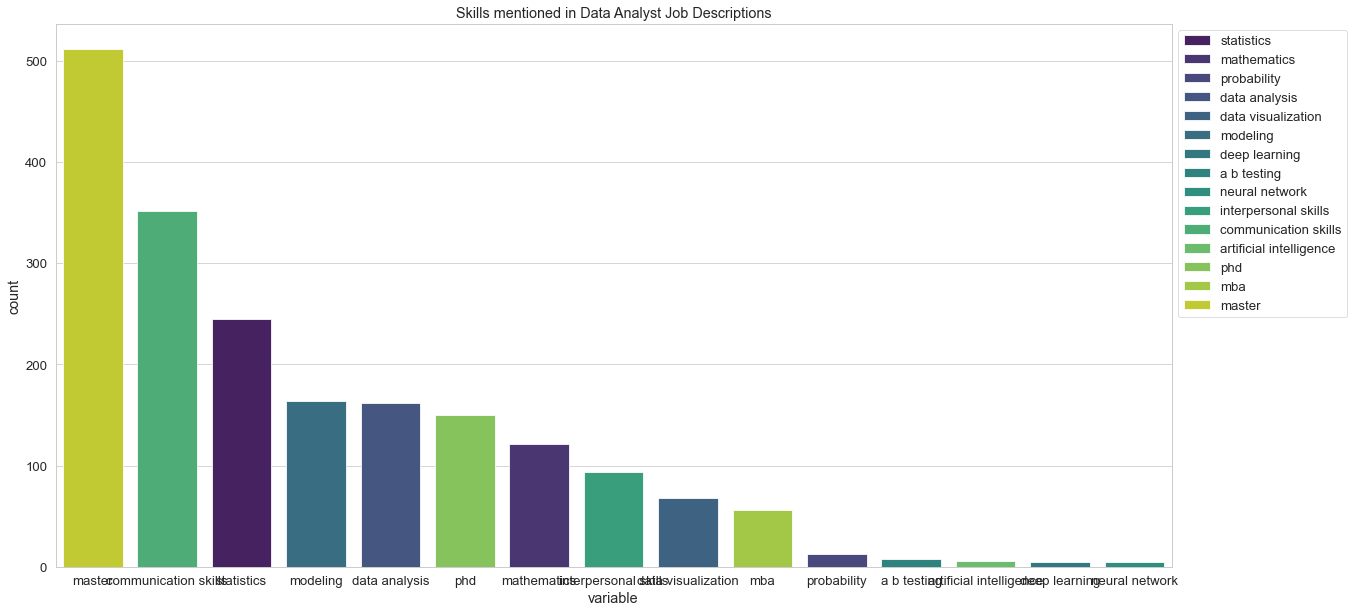

In [527]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(data=df_dss_melt.loc[df_dss_melt['value']==1], x='variable', hue='variable', dodge=False, palette='viridis', order=df_dss_melt['variable'][df_dss_melt['value'] == 1].value_counts().index)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Skills mentioned in Data Analyst Job Descriptions')

## percent da skills


In [528]:
df_da = df[df['category'] == 'Data Scientist'].iloc[:,8:27]

In [529]:
df_da_2 = pd.DataFrame(df_da.sum()/df_da.count())

In [530]:
df_da_2.reset_index(inplace=True)

In [531]:
df_da_2.columns = ['tool', 'percent']

In [532]:
df_da_2 = df_da_2.sort_values(['percent'], ascending=False).reset_index(drop=True)

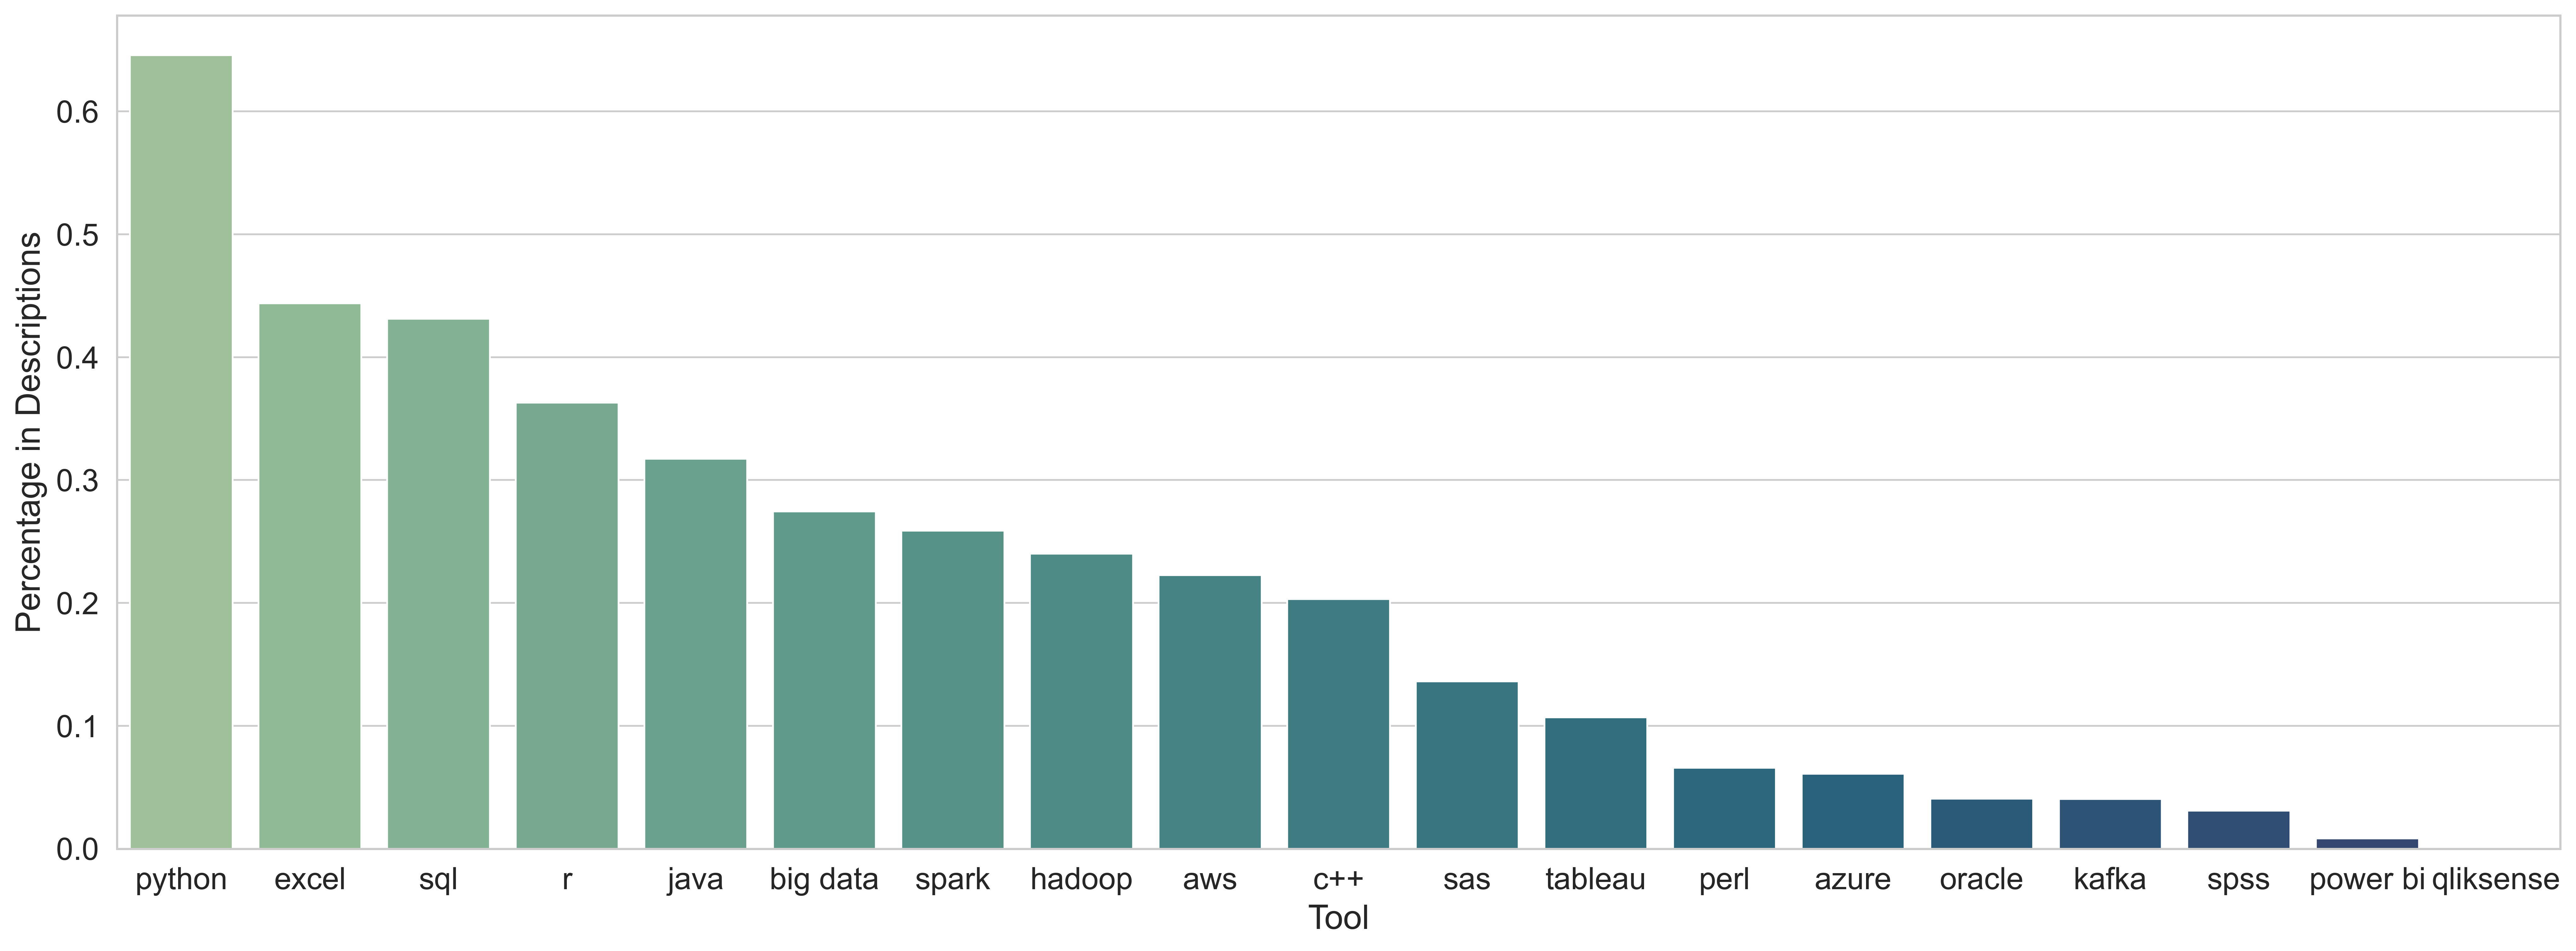

In [586]:
plt.figure(figsize=(20, 7), dpi=500)
sns.set_context("paper", font_scale=1.6)
sns.barplot(data = df_da_2, x = 'tool', y='percent', palette='crest')
plt.xlabel('Tool')
plt.ylabel('Percentage in Descriptions')
plt.savefig('tools.png')

## percent soft skills

In [534]:
df_ds = df[df['category'] == 'Data Scientist'].iloc[:,27:41]

In [535]:
df_ds_2 = pd.DataFrame(df_ds.sum()/df_ds.count())

In [536]:
df_ds_2.reset_index(inplace=True)

In [537]:
df_ds_2.columns = ['tool', 'percent']

In [538]:
df_ds_2 = df_ds_2.sort_values(['percent'], ascending=False).reset_index(drop=True)

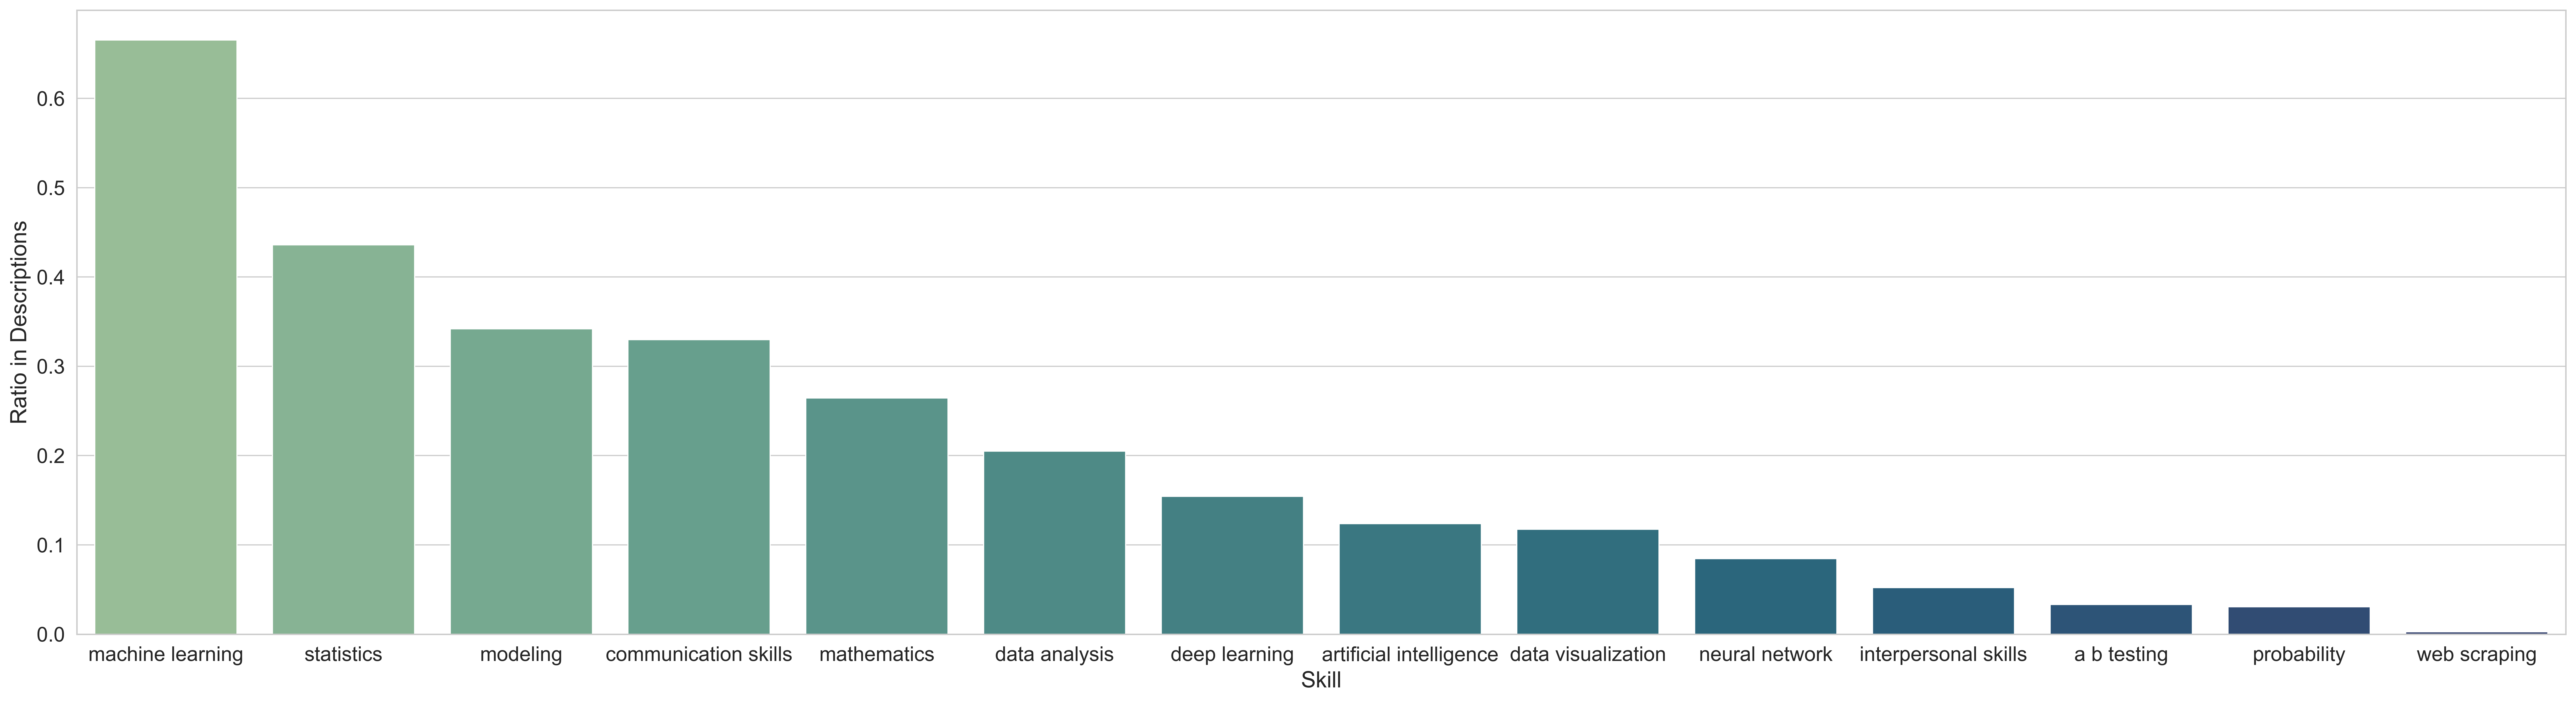

In [579]:
plt.figure(figsize=(25, 7), dpi=500)
sns.set_context("paper", font_scale=1.6)
sns.barplot(data = df_ds_2, x = 'tool', y='percent', palette='crest')
plt.xlabel('Skill')
plt.ylabel('Ratio in Descriptions')
plt.tight_layout()
plt.savefig('skills.png')

## percent education

In [557]:
df_de = df[df['category'] == 'Data Scientist'].iloc[:,41:45]

In [558]:
df_de_2 = pd.DataFrame(df_de.sum()/df_de.count())

In [559]:
df_de_2.reset_index(inplace=True)

In [560]:
df_de_2.columns = ['tool', 'percent']

In [561]:
#df_de_2 = df_de_2.sort_values(['percent'], ascending=False).reset_index(drop=True)

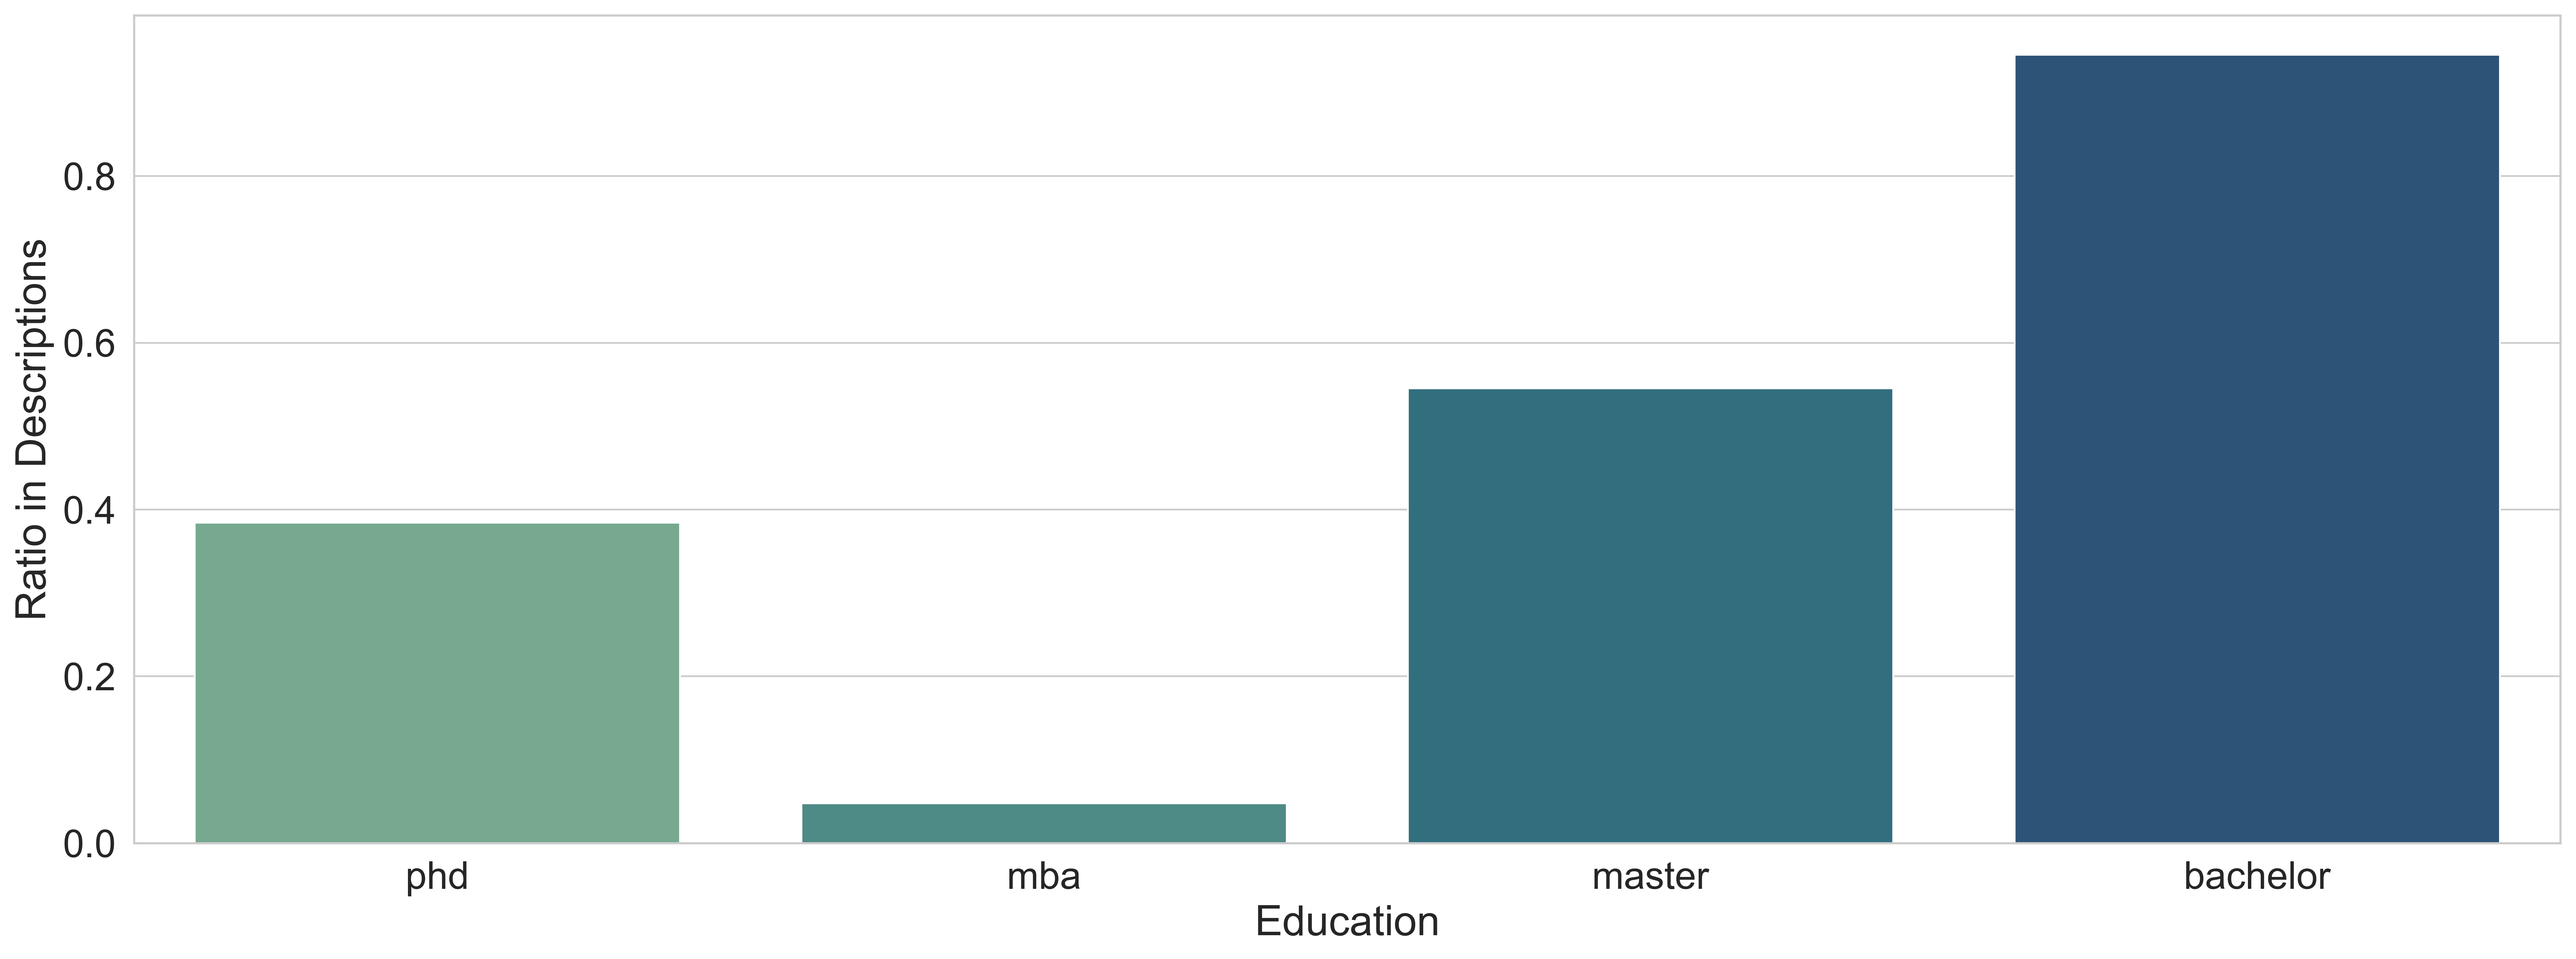

In [581]:
plt.figure(figsize=(20, 7), dpi=500)
sns.set_context("paper", font_scale=2)
sns.barplot(data = df_de_2, x = 'tool', y='percent', palette='crest')
plt.xlabel('Education')
plt.ylabel('Ratio in Descriptions')
plt.savefig('education.png')

## Location

In [568]:
df_2 = df[df['category'] == 'Data Scientist'].groupby('state').count() #.sort_values('position', ascending=False)
df_2.reset_index(inplace=True)

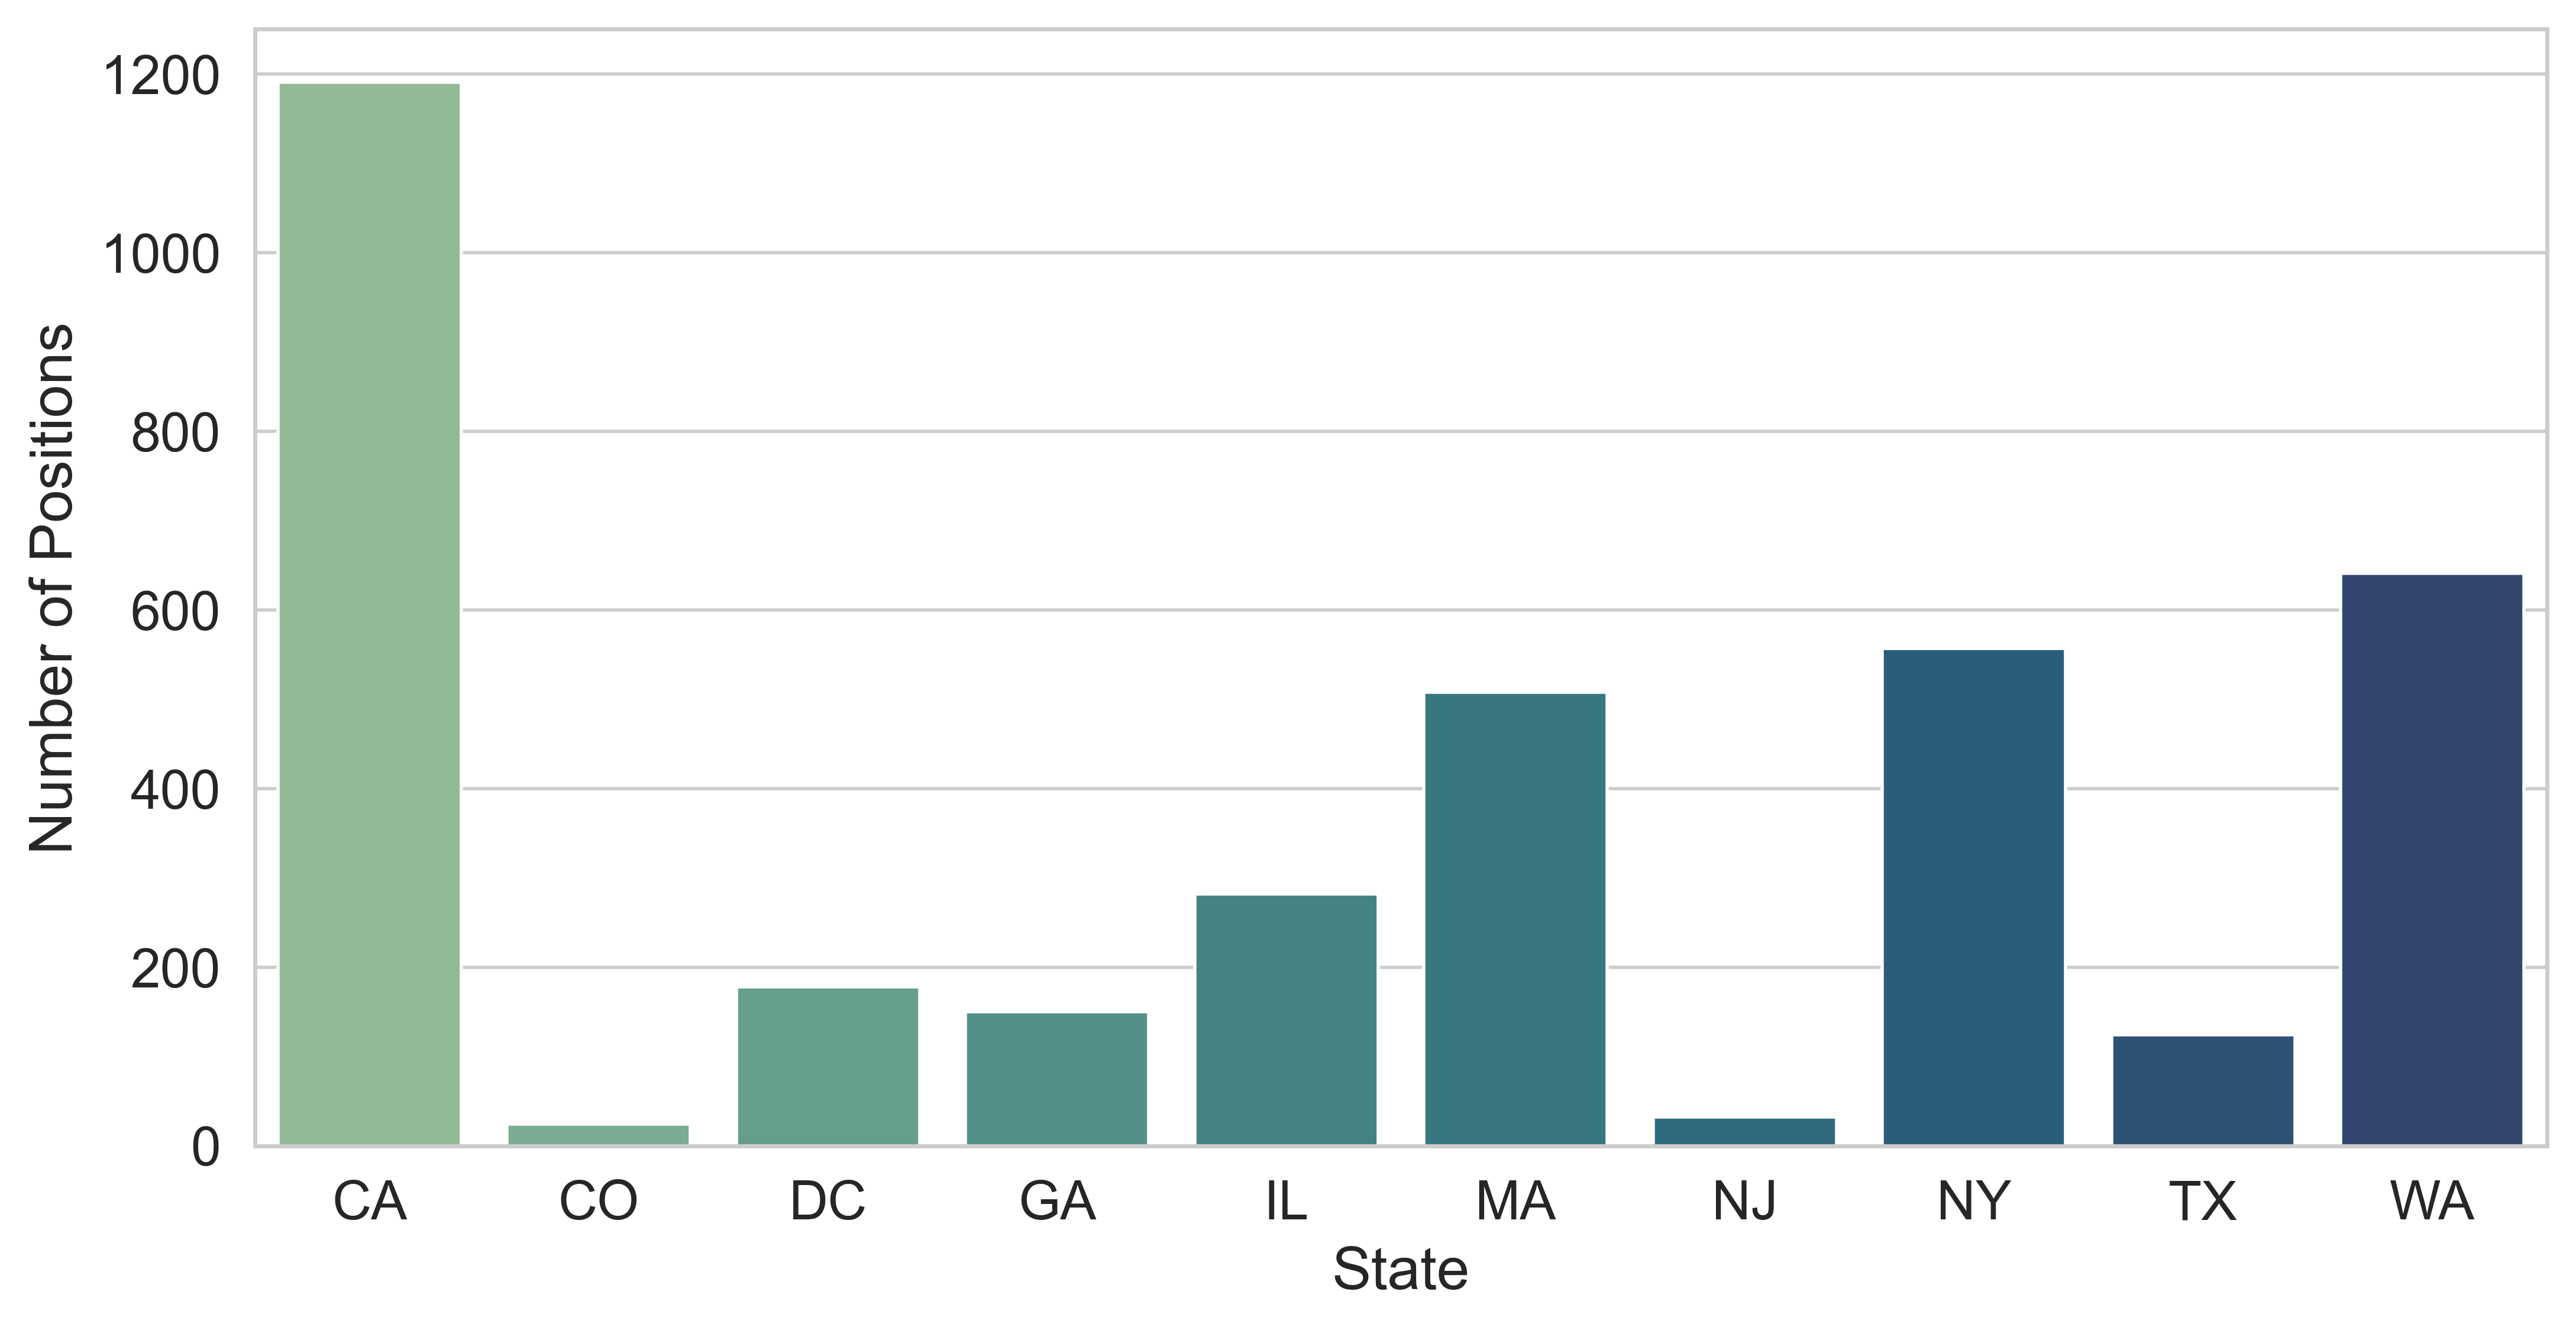

In [584]:
plt.figure(figsize=(10,5), dpi=500)
sns.set_context("paper", font_scale=1.5)
sns.barplot(x='state', y='position', data=df_2, palette='crest')
plt.ylabel('Number of Positions')
plt.xlabel('State')
plt.savefig('location.png')

In [570]:
len(df[df['category'] == 'Data Analyst'])

854

In [571]:
df.to_csv('final_data_jobs.csv')